In [1]:
#Initial Imports

import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression


In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Slicing the dataset to begin on January 1st, 1990

cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

In [4]:
# Creating a series using "Price" percentage returns,and checking the results:

returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()

#Adding a new column

cad_jpy_df['Returns'] = returns


cad_jpy_df.tail()

,Price,Open,High,Low,Returns
Date,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508
2020-06-03,80.70,80.40,80.82,79.96,0.373134
2020-06-04,80.71,80.80,80.89,80.51,0.012392


### Lagged Returns 

In [5]:
# Creating a lagged return 
cad_jpy_df['Lagged_Return'] = cad_jpy_df.Returns.shift()
cad_jpy_df = cad_jpy_df.dropna()
cad_jpy_df.tail()



,Price,Open,High,Low,Returns,Lagged_Return
Date,,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697,-0.114913
2020-06-01,79.27,78.21,79.36,78.04,1.251756,0.076697
2020-06-02,80.40,79.26,80.56,79.15,1.425508,1.251756
2020-06-03,80.70,80.40,80.82,79.96,0.373134,1.425508
2020-06-04,80.71,80.80,80.89,80.51,0.012392,0.373134


### Train Test Split

In [6]:
# Creating a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [7]:
# Create four dataframes with train/test split

X_train = train['Lagged_Return'].to_frame()
X_test = test['Lagged_Return'].to_frame()
y_train = train["Returns"].to_frame()
y_test = test["Returns"].to_frame()

In [8]:
# Previewing the X_train data
X_train.tail()

,Lagged_Return
Date,
2017-12-25,-0.011240
2017-12-26,0.033723
2017-12-27,0.269693
2017-12-28,0.392245
2017-12-29,0.256754


# Linear Regression Model

In [9]:
# Creating a Linear Regression model and fitting it to the training data
from sklearn.linear_model import LinearRegression

# Fitting a SKLearn linear regression using  just the training set (X_train, Y_train):

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions using the Testing Data



In [10]:
# Making a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [11]:
# Gathering actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:

results = y_test

results['Future_Returns'] = predictions

results.head()

,Returns,Future_Returns
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

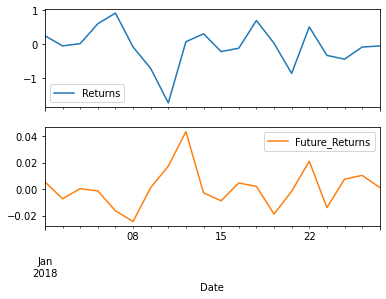

In [12]:
# Plotting the first 20 predictions vs the true values

results[:20].plot(subplots=True)

# Out-of-Sample Performance



In [13]:
# Calculatimg the mean_squared_error (MSE) on actual versus predicted test "y" 

from sklearn.metrics import mean_squared_error


mse = mean_squared_error(
    results['Returns'], results['Future_Returns']
)


# calculating the root-mean-squared error (RMSE): , using the mean-squared-error.
rmse = np.sqrt(mse)
print("Out-of-Sample Root Mean Squared Error (RMSE): " + str(rmse))


Out-of-Sample Root Mean Squared Error (RMSE): 0.6445805658569028


# In-Sample Performance



In [14]:
# Building a dataframe using just the "y" training data:
in_sample_results = y_train


# Adding a column of "in-sample" predictions to that dataframe:  
in_sample_results['In_sample_results'] = model.predict(X_train)


# Calculating in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
in_sample_results['Returns'], in_sample_results['In_sample_results']
)

# Calculating in-sample root mean_squared_error (for comparison to out-of-sample)
rmse_in_results = np.sqrt(in_sample_mse)

print("In-sample Root Mean Squared Error (RMSE): " + str(rmse_in_results))

In-sample Root Mean Squared Error (RMSE): 0.841994632894117


# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

This model did perform better at a very low Root Mean Squared Error value.